# 그래디언트 부스팅과 스태킹을 통한 호텔 리뷰 긍부정 분석

**호텔에 대한 긍부정 리뷰 START**

<img src="https://www.lottehotel.com/content/dam/lotte-hotel/city/mapo/overview/introduction/190725-1-768-ove-LTMA.png.thumb.768.768.jpg">

# Table of contents

[<h3>1. Presentation of the data</h3>](#1)

[<h3>2. Explorative analysis</h3>](#2)

[<h3>3. Prediction of the review score with supervised learning</h3>](#3)



# 1. Presentation of the data<a class="anchor" id="1"></a>

<strong><u>Data Context:</u></strong><br>
이 데이터셋은 유럽 전역의 1,493개 고급 호텔에 대한 515,000개의 고객 리뷰와 평가를 포함하고 있다. 한편, 호텔의 지리적 위치도 추가 분석을 위해 제공함

<strong><u>Data Content:</u></strong>
The csv file contains 17 fields. The description of each field is as below:
<br>- <strong>Hotel_Address:</strong>  호텔의 주소
<br><br>- <strong>Review_Date:</strong>  리뷰어가 해당 리뷰를 게시한 날짜
<br><br>- <strong>Average_Score:</strong>  지난해에 최신 코멘트를 기준으로 계싼된 호텔의 평균 점수
<br><br>- <strong>Hotel_Name:</strong>  호텔의 이름
<br><br>- <strong>Reviewer_Nationality:</strong>  리뷰어의 국적
<br><br>- <strong>Negative_Review:</strong>  부정적 리뷰의 총 단어 수
<br><br>- <strong>Review_Total_Negative_Word_Counts:</strong> 리뷰어가 호텔에 부여한 부정적인 리뷰, 리뷰어가 부정적인 리뷰를 하지 않은 경우 'No Negative'가 됨
<br><br>- <strong>Positive_Review:</strong>  리뷰어가 호텔에 부여한 긍정적인 리뷰, 리뷰어가 부정적인 리뷰를 하지 않은 경우 'No Positive'가 됨
<br><br>- <strong>Review_Total_Positive_Word_Counts:</strong>  긍정적 리뷰의 총 단어 수
<br><br>- <strong>Reviewer_Score:</strong>  리뷰어가 자신의 경험을 바탕으로 호텔에 부유한 점수
<br><br>- <strong>Total_Number_of_Reviews_Reviewer_Has_Given:</strong>  리뷰어가 과거에 작성한 리뷰의 수
<br><br>- <strong>Total_Number_of_Reviews:</strong>  호텔이 받은 유효한 리뷰의 총 수
<br><br>- <strong>Tags:</strong>  리뷰어가 호텔에 부여한 태그
<br><br>- <strong>days_since_review:</strong>  리뷰 날짜와 데이터 스크랩 날짜 사이의 기간
<br><br>- <strong>Additional_Number_of_Scoring:</strong> 리뷰 대신 서비스에 대한 평가를 한 손님도 있다. 이 숫자는 리뷰 없이 유효한 점수가 몇 개인지를 나타냄
<br><br>- <strong>lat:</strong>  호텔의 위도
<br><br>- <strong>lng:</strong>  호텔의 경도

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

df = pd.read_csv("/Users/helloworld/Desktop/high_stata_Final/Hotel_Reviews.csv")

df.head(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [2]:
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


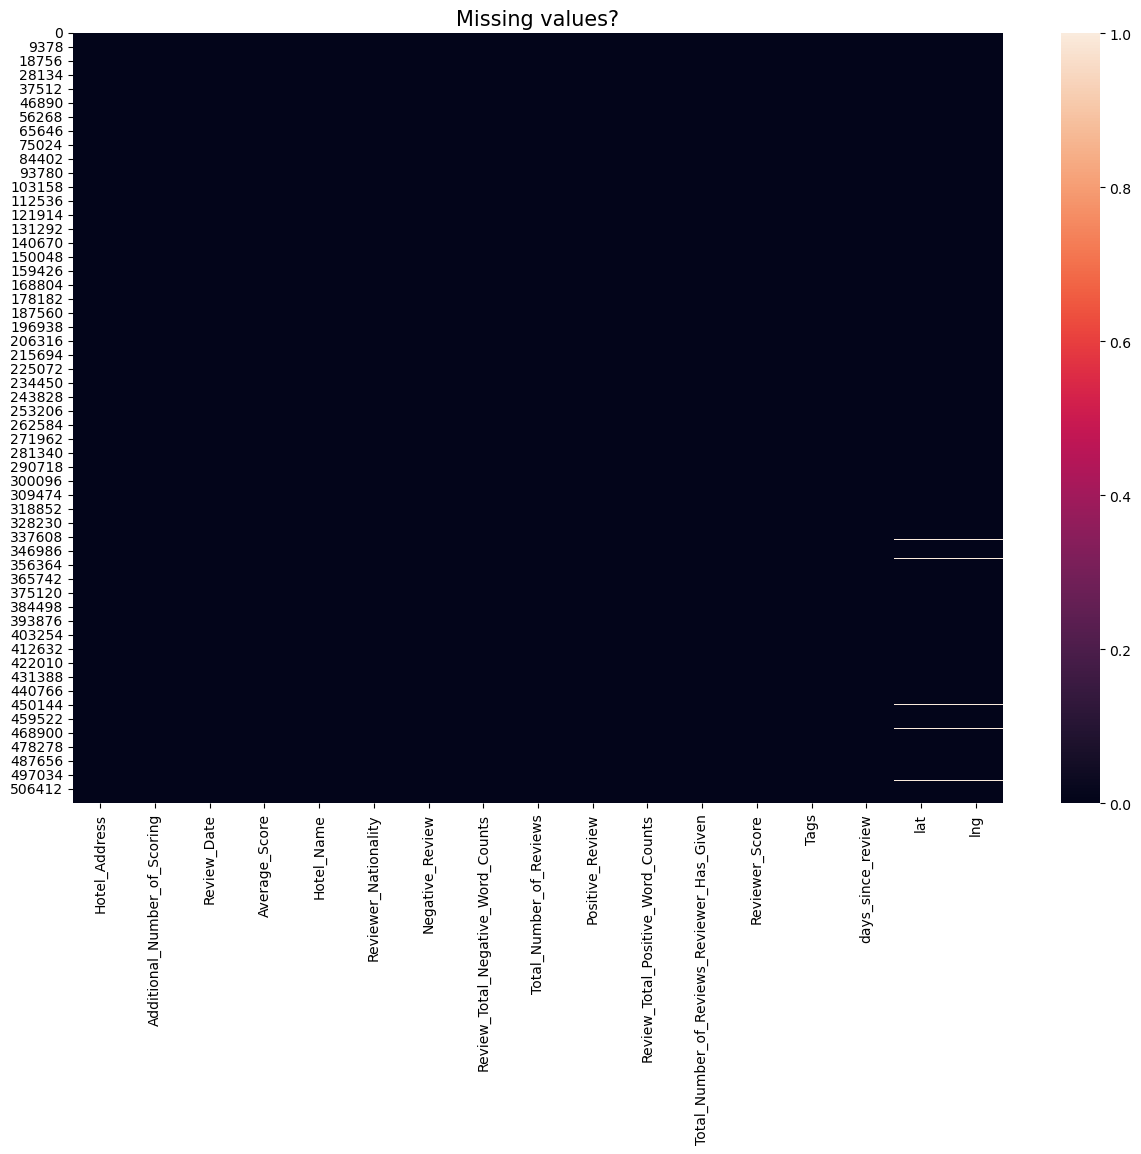

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())
plt.title("Missing values?", fontsize = 15)
plt.show()

위도와 경도 변수에서 몇몇 누락된 값들을 제외하면 이 데이터에 누락된 값은 없는것으로 나타났다. 

In [4]:
nb_missing = df[df["lat"].isnull() & df["lng"].isnull()].shape[0]
print(f"Number of reviews with no latitude or longitude: {nb_missing}\nTotal number of reviews: {df.shape[0]}")

Number of reviews with no latitude or longitude: 3268
Total number of reviews: 515738


# 2. Explorative analysis<a class="anchor" id="2"></a>

In [16]:
print("Number of hotels:",df['Hotel_Name'].nunique())

Number of hotels: 1492


<strong> Location of the hotels:</strong>
<img src="https://i.imgur.com/DWAh8Om.png">

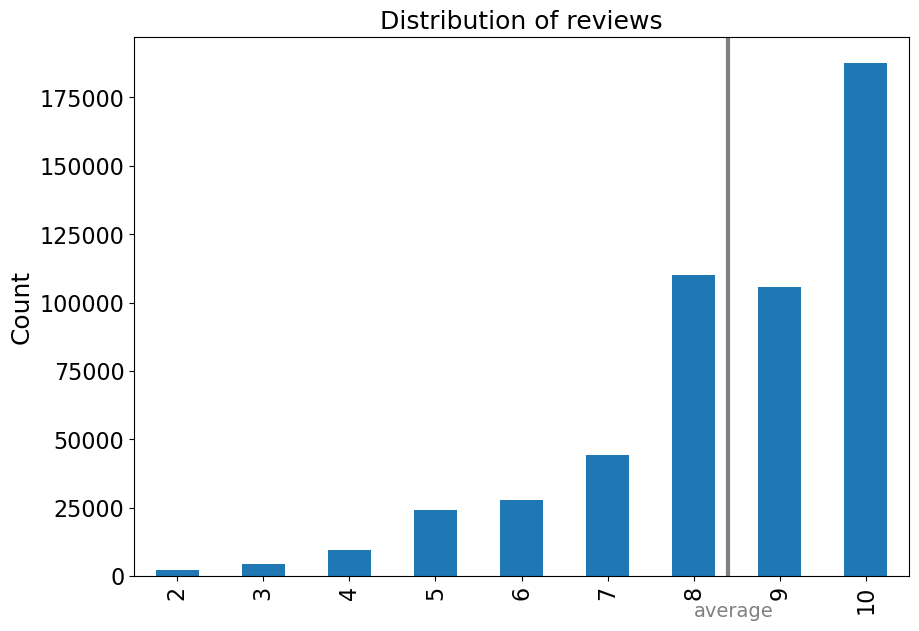

In [5]:
# Create a column with the rounded reviews
df["Reviewer_Score_Round"] = df["Reviewer_Score"].apply(lambda x: int(round(x)))

# Get the number of reviews with which scores
reviews_dist = df["Reviewer_Score_Round"].value_counts().sort_index()
bar = reviews_dist.plot.bar(figsize =(10,7))
plt.title("Distribution of reviews", fontsize = 18)
plt.axvline(df["Reviewer_Score"].mean()-2, 0 ,1, color = "grey", lw = 3)
plt.text(6, -15000, "average", fontsize = 14, color = "grey")
plt.ylabel("Count", fontsize = 18)
bar.tick_params(labelsize=16)

# Remove the column "Reviewer_Score_Round"
df.drop("Reviewer_Score_Round", axis = 1, inplace = True)

대부분의 리뷰가  8~0점대로 긍정적이게 분포해 있다. 평균 리뷰 점수는 10점 만점에 8.4점이다. 이는 우리가 기대할 수 있는 정규 분포와는 다를 수 있을것이다.

## Correlation:
Let's see the correlation between the variables.

/var/folders/l4/_52f5tz1673fvwyphb2jx1gr0000gn/T/ipykernel_2947/1401612590.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


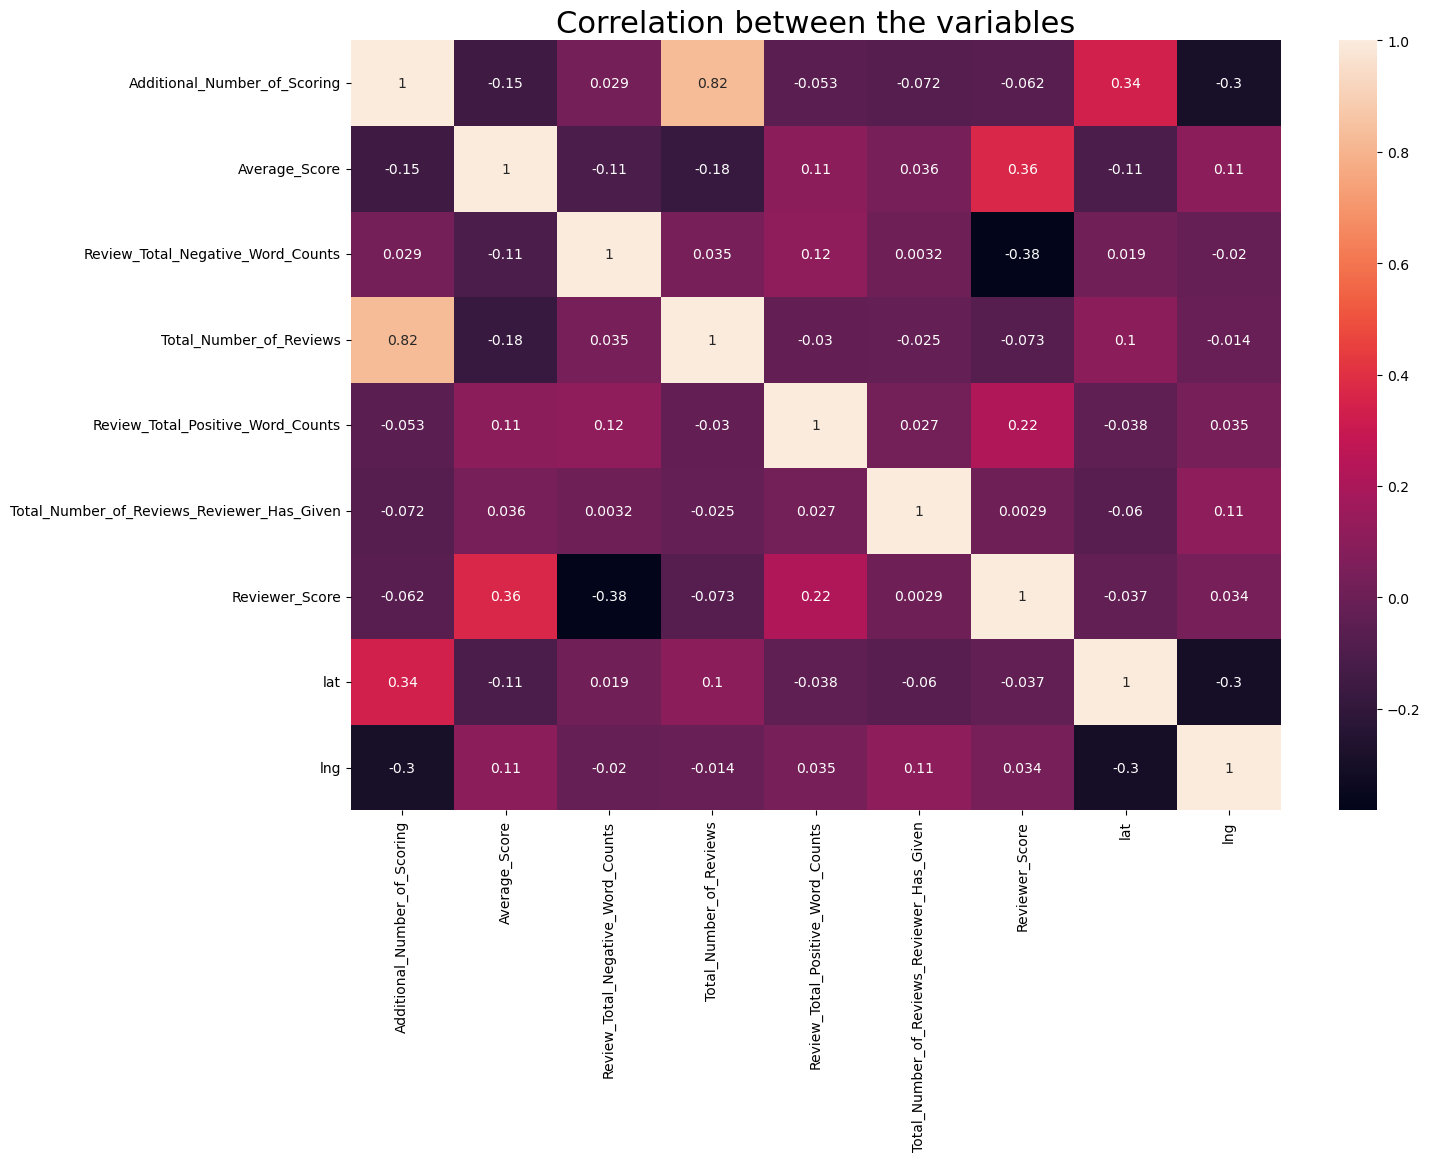

In [6]:
df_corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, annot = True)
plt.title("Correlation between the variables", fontsize = 22)
plt.show()

상관관계가 1에 가까울수록 높은 상관관계를 가진다고 했을때, Additional_Number_of_Scoring 변수와 Total_Number_of_Reviews기 0.82로 강력한 양의 상관관계로 나타남

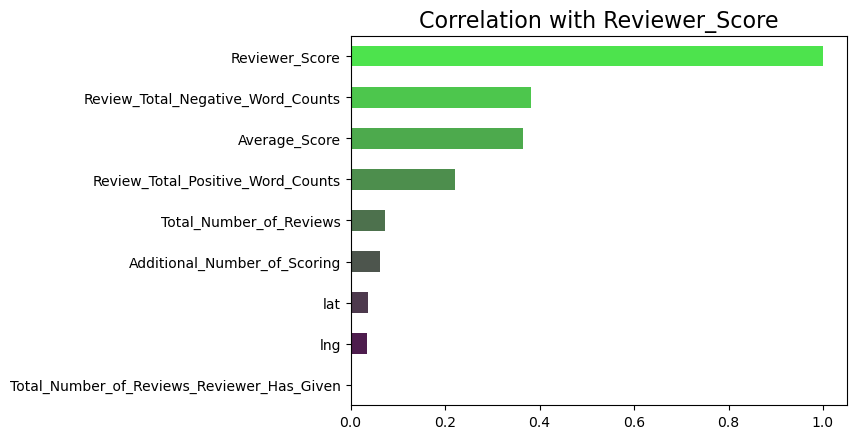

In [7]:
# Get the colors for the graphic
colors = []
dim = df_corr.shape[0]
for i in range(dim):
    r = i * 1/dim
    colors.append((0.3,r,0.3))

# Transform each value in a positive value, because what interesses us
# isn't the direction of the correlation but the absolute correlation
df_corr["Reviewer_Score"].apply(lambda x: abs(x)).sort_values().plot.barh(color = colors)
plt.title("Correlation with Reviewer_Score", fontsize = 16)
plt.show()

#위 코드는 데이터셋 내 변수들과 리뷰어 스코어 간의 상관관계의 강도를 시각화 하기위해 구현되었다. 
#이 코드는 람다 어플라이람다 엑스와 앱스 엑스 함수를 이용해 상관관계 행렬에서 리뷰어 스코어 열의 각 값에 대해 절대값을 취한다.
#이는 상관 관계의 방향(양성 또는 음성) 보다는 상관 관계의 강도(절대값)에 관심이 있기 때문이다. 
#솔트 밸류 함수를 이용해서 절대값들을 오름차순으로 정렬해 보여주고있다.

## Mean review score depending on the reviewer nationality

어떤 국적의 리뷰어들이 호텔에 대해 높은 또는 낮은 평균 점수를 주었는지, 그리고 각 국적별로 얼마나 많은 리뷰가 있는지를 분석

pivot_table: 각 국적별로 리뷰어의 점수를 집계하기 위해  df 데이터프레임을 'Reviewer_Nationality'에 따라 그룹화를 진행
values = "Reviewer_Score"는 집계할 데이터 컬럼으로 'Reviewer_Score'를 지정
index = "Reviewer_Nationality"는 피벗 테이블의 인덱스로 'Reviewer_Nationality' 컬럼을 사용
aggfunc=["mean","count"]는 각 국적별로 'Reviewer_Score'의 평균(mean)과 리뷰의 개수(count)를 계산
group_nationality.columns = ["mean_review","review_count"]는 집계된 결과에 대한 새로운 컬럼 이름을 설정
여기서 'mean_review'는 각 국적별 리뷰 점수의 평균을 나타내고, 'review_count'는 해당 국적별 리뷰의 개수를 나타냄
작업의 결과로, 각 리뷰어의 국적별로 평균 리뷰 점수와 리뷰의 개수가 요약된 새로운 데이터프레임 group_nationality가 생성

In [8]:
# Group the data by nationality
group_nationality = df.pivot_table(values = "Reviewer_Score", 
                                   index = "Reviewer_Nationality", 
                                   aggfunc=["mean","count"])
group_nationality.columns = ["mean_review","review_count"]

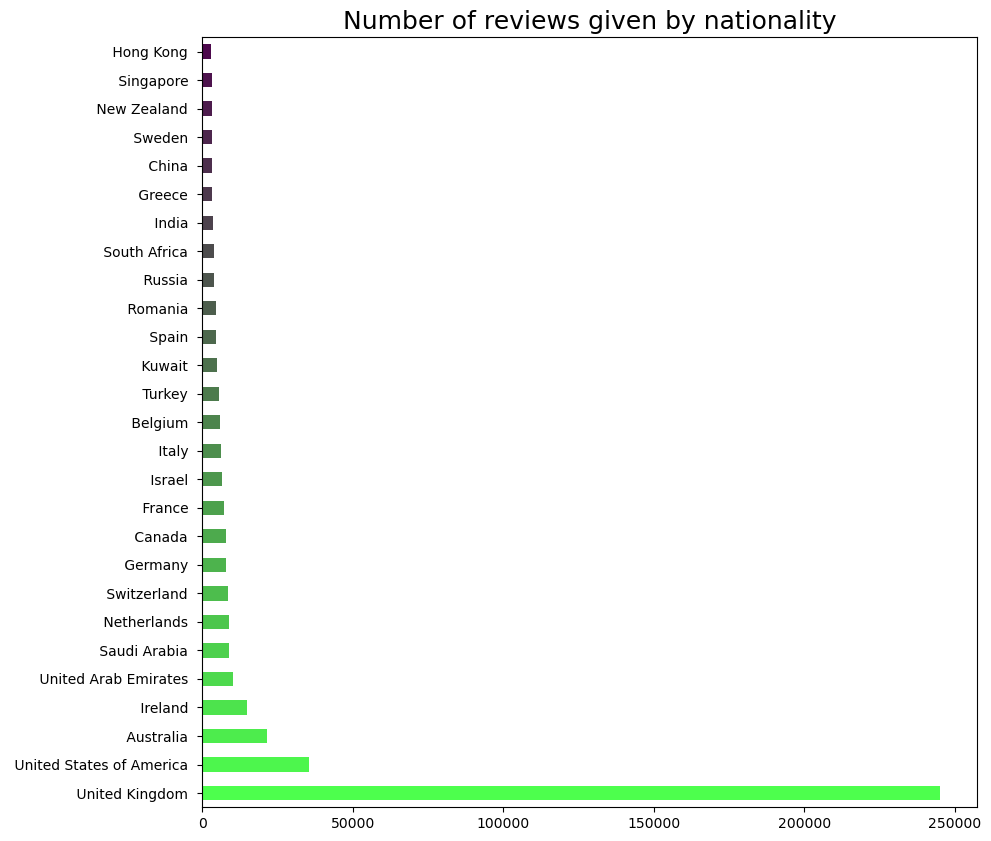

In [9]:
# Keep only the nationalities with at least 3000 reviews given
reviews_count=group_nationality[group_nationality["review_count"]>3000]["review_count"].sort_values(ascending = False)

# Get the colors for the graphic
colors = []
dim = reviews_count.shape[0]
for i in range(dim):
    r = i * 1/dim
    colors.append((0.3,1-r,0.3))

# Display the result
reviews_count.plot.barh(figsize=(10,10), color = colors)
plt.title("Number of reviews given by nationality", fontsize = 18)
plt.ylabel("")
plt.show()

대부분의 리뷰가 영국, 미국, 호주와같은 소수 국가들에게서 쓰여짐

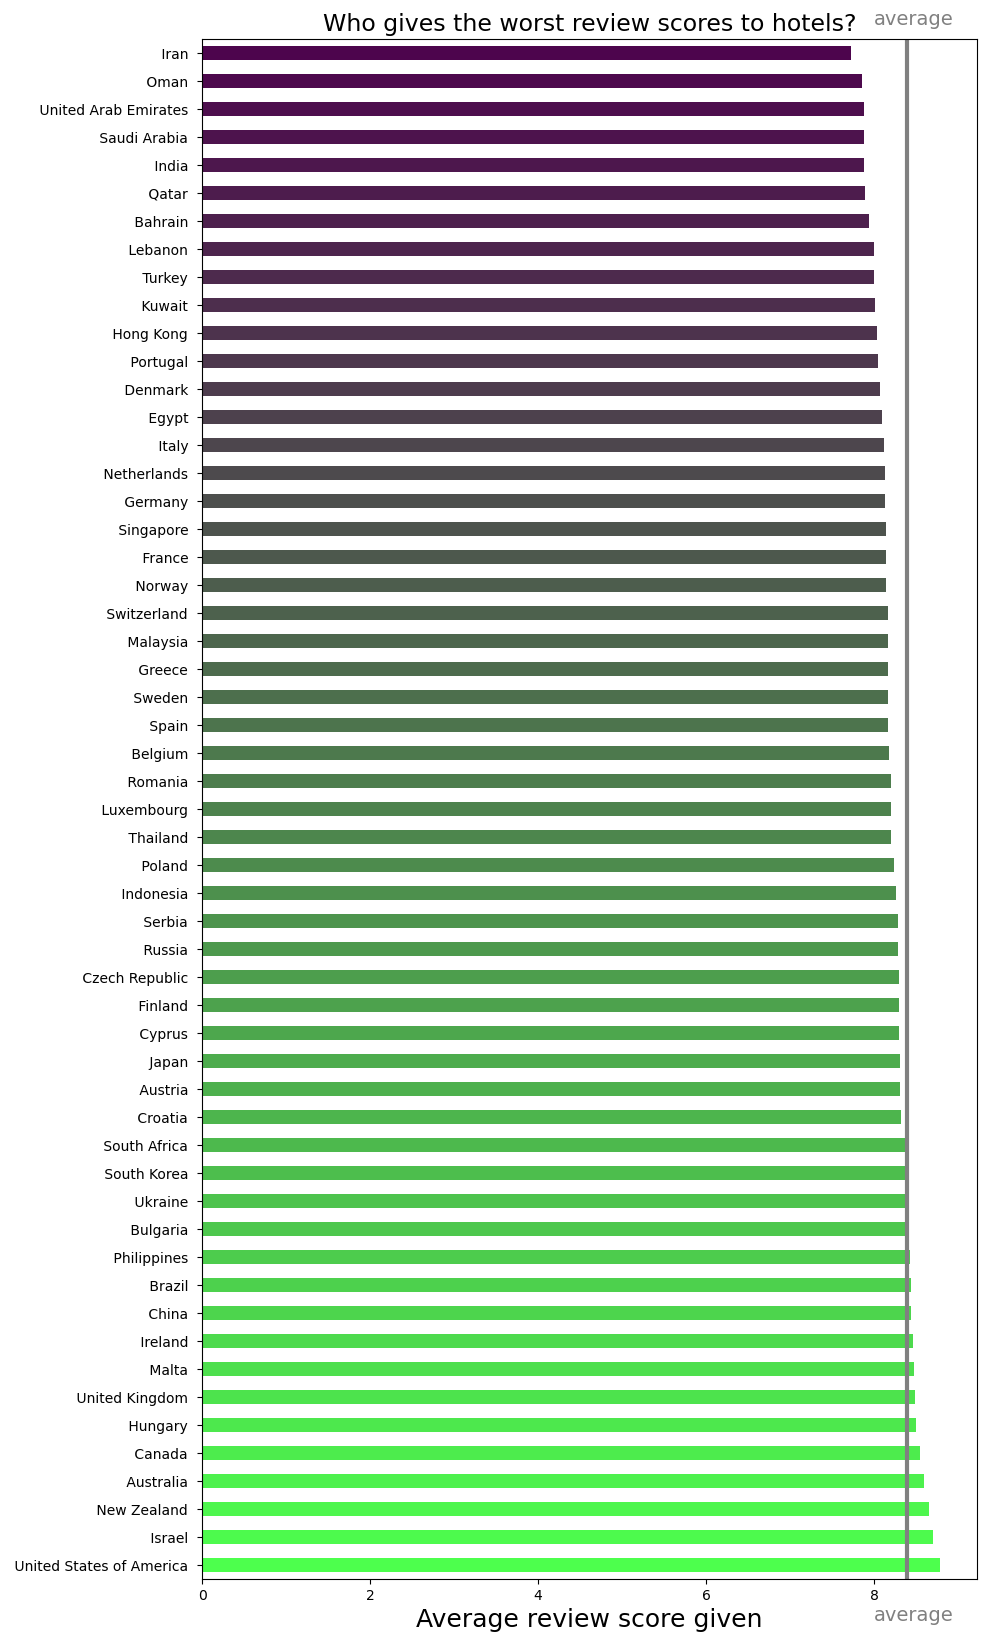

In [10]:
# Keep only the nationalities with at least 1000 reviews
group_nationality = group_nationality[group_nationality["review_count"] > 1000].sort_values(by = "mean_review", ascending = False)

# Get the colors for the graphic
colors = []
dim = group_nationality.shape[0]
for i in range(dim):
    r = i * 1/dim
    colors.append((0.3,1-r,0.3))

# Display the result
group_nationality["mean_review"].plot.barh(figsize = (10,20), color = colors)
plt.title("Who gives the worst review scores to hotels?", fontsize = 17)
plt.axvline(df["Reviewer_Score"].mean(), 0 ,1, color = "grey", lw = 3)
plt.text(8, 55, "average", fontsize = 14, c = "grey")
plt.text(8, -2, "average", fontsize = 14, c = "grey")
plt.xlabel("Average review score given", fontsize = 18)
plt.ylabel("")
plt.show()

평균적으로 영어권 국가들은 가장 좋은 리뷰 점수를 부여하며, 미국이 1위임

# 3. Prediction of the review score with supervised learning<a class="anchor" id="3"></a>
이 부분에서는 다른 변수들을 기반으로 리뷰 점수를 예측하기 위해 다양한 모델을 훈련시킬 것입니다. 모델을 구축하기 전에, 몇 가지 변환이 필요합니다:


In [11]:
# Convert the reviews to lower and delete leading/trailing space
df["Negative_Review"] = df["Negative_Review"].str.lower().str.strip()
df["Positive_Review"] = df["Positive_Review"].str.lower().str.strip()

이 코드는 데이터 전처리의 한 형태로, 데이터셋 내의 'Negative_Review'와 'Positive_Review'라는 두 텍스트 컬럼에 대해 다음과 같은 작업을 수행

.str.lower(): 모든 리뷰 텍스트를 소문자로 변환합니다. 이는 대소문자에 따른 구분 없이 텍스트 데이터를 일관되게 처리하기 위해 사용

.str.strip(): 각 리뷰 텍스트의 시작과 끝에 있는 공백을 제거합니다. 이는 불필요한 공백으로 인한 데이터의 불일치를 방지하고, 텍스트 데이터를 더 깔끔하게 만들기 위해 사용

이 과정을 통해, 리뷰 텍스트 데이터를 분석하기 전에 데이터의 일관성을 높이고, 알고리즘의 정확도를 개선하기 위한 기본적인 텍스트 정제 과정을 수행 예를 들어, "Good "과 "good"과 " GOOD"을 모두 동일한 "good"으로 처리하여 분석의 정확도를 높일 수 있음




각 리뷰 텍스트는 NLTK를 사용하여 분석되고, SentimentIntensityAnalyzer를 사용하면 텍스트가 긍정적인지 부정적인지 확인할 수 있음 예:

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

rev1 = "The hotel was very good, I love it!"
rev2 = "It was just horrible, the worst ever."

print(f"review 1:\n{rev1}\nScore: {sent_analyzer.polarity_scores(rev1)}")

print(f"\nreview 2:\n{rev2}\nScore: {sent_analyzer.polarity_scores(rev2)}")

review 1:
The hotel was very good, I love it!
Score: {'neg': 0.0, 'neu': 0.386, 'pos': 0.614, 'compound': 0.8386}

review 2:
It was just horrible, the worst ever.
Score: {'neg': 0.603, 'neu': 0.397, 'pos': 0.0, 'compound': -0.8225}


compound는 텍스트의 일반적인 긍정성을 나타냅니다. 0 이상이면 긍정적이고, 0 이하면 부정적이다. 이는 텍스트가 긍정적인지 부정적인지를 결정하는 데 사용될 수 있다.

긍정적 리뷰의 감성 점수와 부정적 리뷰의 감성 점수에 대한 두 개의 컬럼을 만든다. 감성 점수가 정확하지 않을 수 있으며, 모델에서 문제를 피하기 위해 긍정적 리뷰의 감성 점수는 0 이상, 부정적 리뷰의 감성 점수는 0 이하로만 설정됨

In [13]:
# Take only a part of the data to speed up
# df = df[:50000].copy()

start_time = time.time()
pos = df["Positive_Review"].apply(lambda x: abs(sent_analyzer.polarity_scores(x)["compound"]))
neg = df["Negative_Review"].apply(lambda x: -abs(sent_analyzer.polarity_scores(x)["compound"]))

df["sentiment_score"] = pos + neg
df["polarity_pos"] = pos
df["polarity_neg"] = neg

time_model = time.time() - start_time
print(f"Execution time: {int(time_model)} seconds")

Execution time: 148 seconds


/var/folders/l4/_52f5tz1673fvwyphb2jx1gr0000gn/T/ipykernel_2947/1557998278.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


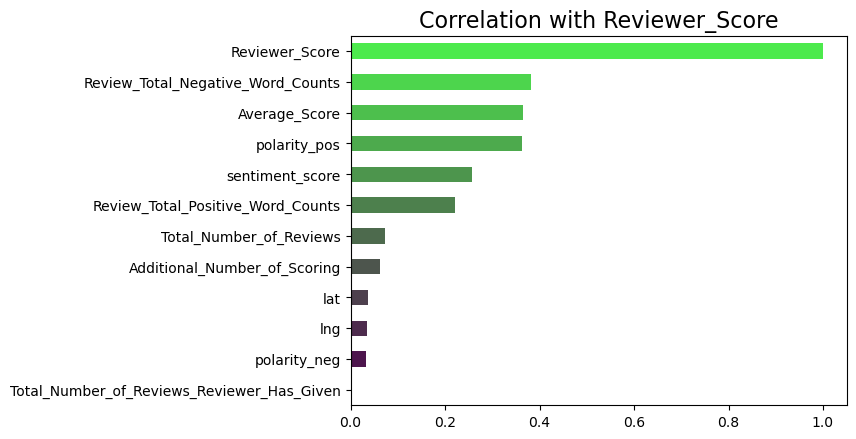

In [14]:
df_corr = df.corr()

# Get the colors for the graphic
colors = []
dim = df_corr.shape[0]
for i in range(dim):
    r = i * 1/dim
    colors.append((0.3,r,0.3))

# Transform each value in a positive value, because what interesses us
# isn't the direction of the correlation but the absolute correlation
df_corr["Reviewer_Score"].apply(lambda x: abs(x)).sort_values().plot.barh(color = colors)
plt.title("Correlation with Reviewer_Score", fontsize = 16)
plt.show()

The variable which influences the most the reviewer score is the length of the negative review. It is logical, because if someone really didn't like a hotel, he might write a lot about it.

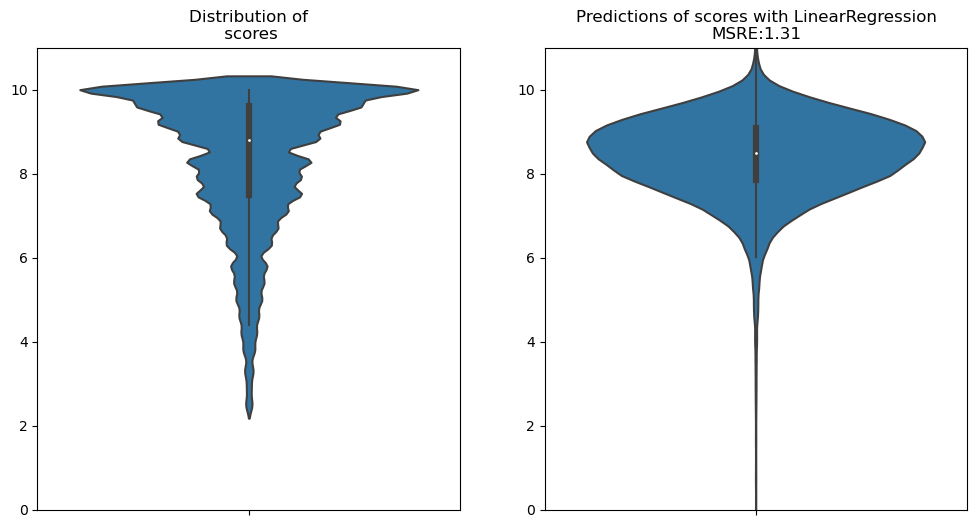

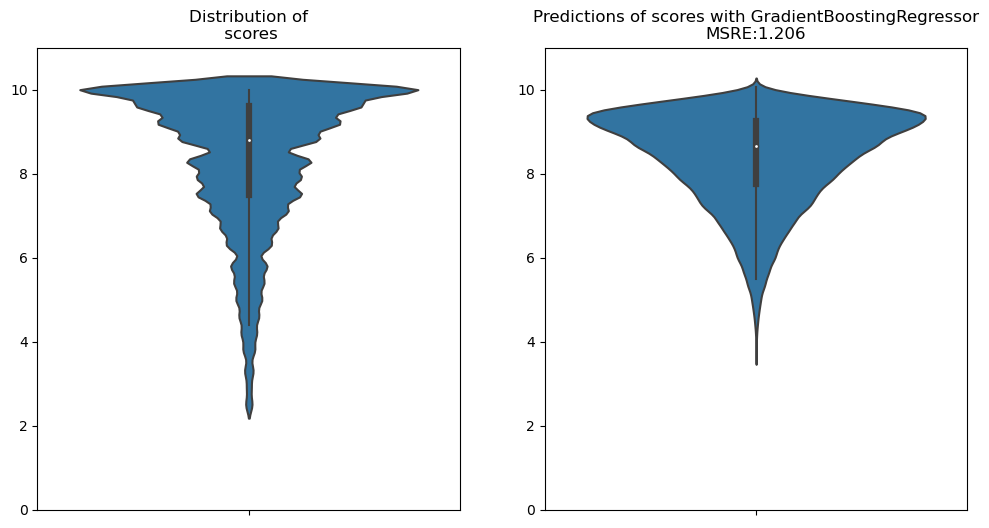

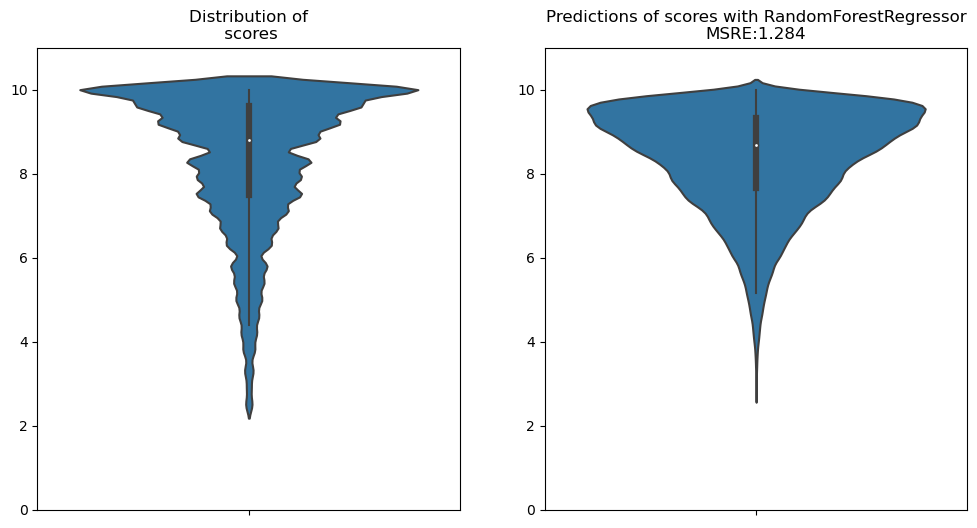

In [15]:
# Columns to use to train the models
# Only the columns with the highest correlation were chosen
cols = ['Review_Total_Negative_Word_Counts',
        'polarity_pos',
        'Average_Score',
        'Review_Total_Positive_Word_Counts']
        
X = df[cols].values
y = df["Reviewer_Score"].values

# Use StandardScaler to scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.metrics import mean_squared_error

def plot_res(y_test, pred, model="LinearRegression"):
    MSRE = round((mean_squared_error(y_test, pred))**0.5, 3)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    
    sns.violinplot(y=y_test, ax=axes[0])
    axes[0].set_title("Distribution of\n scores")
    axes[0].set_ylim(0, 11)
    
    sns.violinplot(y=pred, ax=axes[1])
    title = f"Predictions of scores with {model}\nMSRE:{MSRE}"
    axes[1].set_title(title)
    axes[1].set_ylim(0, 11)
    plt.show()

    
# LinearRegression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
plot_res(y_test,pred, model = "LinearRegression")

# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
plot_res(y_test,pred, model = "GradientBoostingRegressor")

# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
plot_res(y_test,pred, model = "RandomForestRegressor")

그래디언트부스팅회귀모델이 가장 좋은 성능을 가진것으로 보임  이하에서 더 다양한 검정을 수행해 봄


In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the models
models = {
    "LinearRegression": LinearRegression(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "RandomForestRegressor": RandomForestRegressor()
}

# Dictionary to hold cross-validation results
cv_results = {}

# Perform cross-validation for each model
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -cv_scores  # Convert from negative to positive
    rmse_scores = np.sqrt(mse_scores)  # Calculate RMSE scores
    avg_rmse = np.mean(rmse_scores)  # Calculate average RMSE
    cv_results[model_name] = avg_rmse  # Store the results

cv_results


{'LinearRegression': 1.3088881781739996,
 'GradientBoostingRegressor': 1.2044438224086265,
 'RandomForestRegressor': 1.2852677999702133}

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the models
models = {
    "LinearRegression": LinearRegression(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "RandomForestRegressor": RandomForestRegressor()
}

# Dictionary to hold cross-validation results
cv_results = {}

# Define a function to calculate MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Perform cross-validation for each model
for model_name, model in models.items():
    # Calculate RMSE as previously done
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -cv_scores
    rmse_scores = np.sqrt(mse_scores)
    avg_rmse = np.mean(rmse_scores)

    # Calculate MAE
    cv_mae_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    mae_scores = -cv_mae_scores
    avg_mae = np.mean(mae_scores)

    # Calculate R-squared
    cv_r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    avg_r2 = np.mean(cv_r2_scores)

    # Calculate Adjusted R-squared
    n = X.shape[0]
    p = X.shape[1]
    adj_r2 = 1 - (1 - avg_r2) * ((n - 1) / (n - p - 1))

    # Calculate MAPE
    y_pred = model.fit(X, y).predict(X)
    mape = calculate_mape(y, y_pred)

    # Store the results
    cv_results[model_name] = {
        "RMSE": avg_rmse,
        "MAE": avg_mae,
        "R-squared": avg_r2,
        "Adjusted R-squared": adj_r2,
        "MAPE": mape
    }

cv_results


{'LinearRegression': {'RMSE': 1.3088881781739996,
  'MAE': 0.9913514934909706,
  'R-squared': 0.3596163990977438,
  'Adjusted R-squared': 0.35961143231376136,
  'MAPE': 14.536771325816142},
 'GradientBoostingRegressor': {'RMSE': 1.204443655262018,
  'MAE': 0.8983007912985173,
  'R-squared': 0.4576179892052048,
  'Adjusted R-squared': 0.45761378251677653,
  'MAPE': 13.07827973416065},
 'RandomForestRegressor': {'RMSE': 1.285394939255648,
  'MAE': 0.9533923232678001,
  'R-squared': 0.38265509282666005,
  'Adjusted R-squared': 0.38265030472966277,
  'MAPE': 7.948237621930362}}

스태킹으로 한단계 더 좋은 성능을 얻게됨

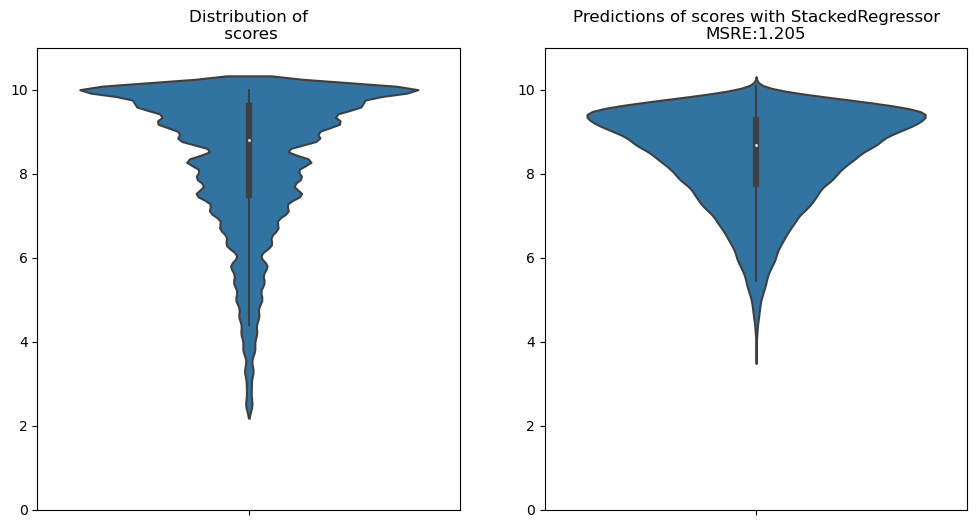

In [16]:
from sklearn.ensemble import StackingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# 기본 모델 정의
estimators = [
    ('lr', make_pipeline(StandardScaler(), LinearRegression())),
    ('gb', make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=0))),
    ('rf', make_pipeline(StandardScaler(), RandomForestRegressor(random_state=0)))
]

# 스태킹 회귀 모델 생성
stacked_regressor = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

# 모델 학습
stacked_regressor.fit(X_train, y_train)

# 예측
pred = stacked_regressor.predict(X_test)

# 평가
plot_res(y_test, pred, model="StackedRegressor")


메타모델을 생성해 학습

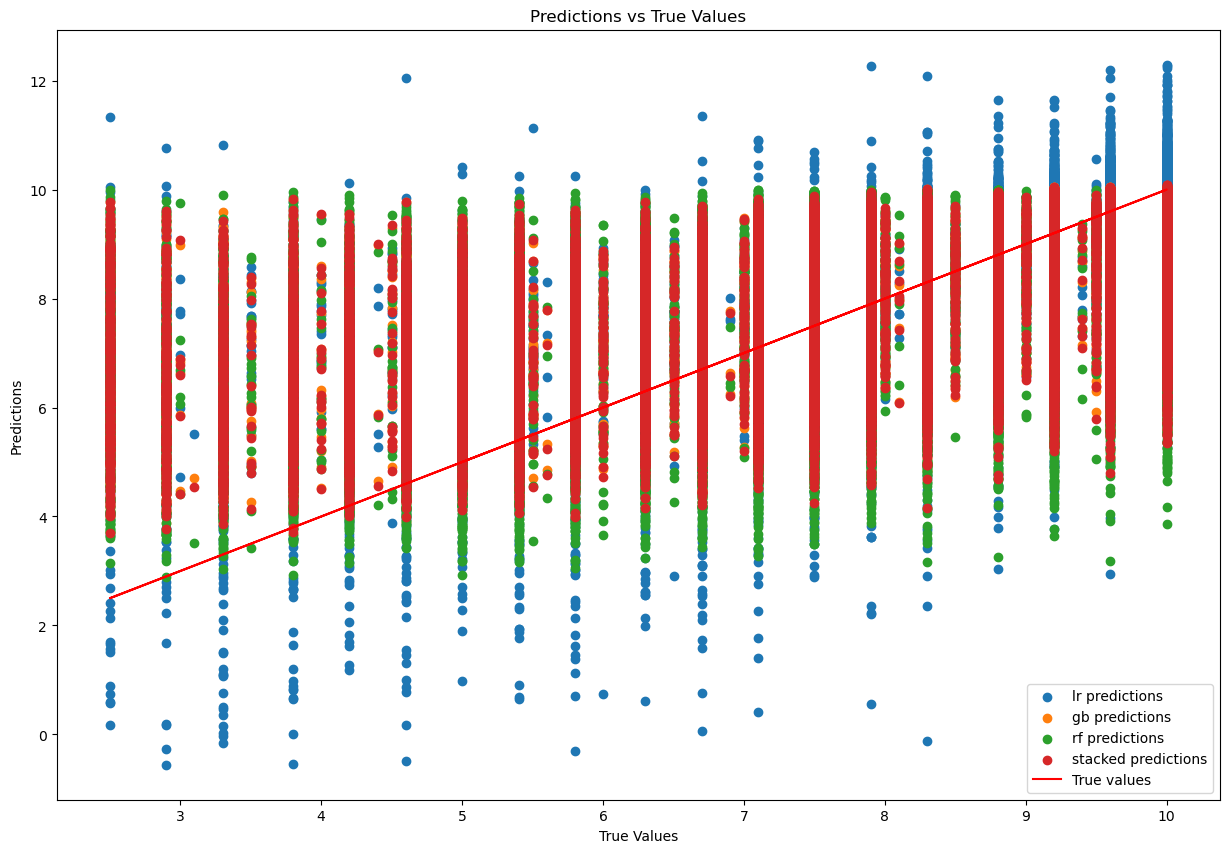

lr - MSE: 1.716, R^2: 0.359
gb - MSE: 1.454, R^2: 0.457
rf - MSE: 1.650, R^2: 0.384
stacked - MSE: 1.451, R^2: 0.458


In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# 각 기본 모델을 학습하고 예측값을 계산
base_predictions = {}
for est_name, est_pipeline in estimators:
    # 'est_pipeline'을 학습 데이터셋에 맞춤
    est_pipeline.fit(X_train, y_train)
    # 학습된 모델로부터 예측값을 계산합
    base_predictions[est_name] = est_pipeline.predict(X_test)

# 스태킹 모델의 예측값도 계산
base_predictions['stacked'] = pred  

# 예측값 비교를 위한 플롯 생성
plt.figure(figsize=(15, 10))
for est_name, preds in base_predictions.items():
    plt.scatter(y_test, preds, label=f'{est_name} predictions')

plt.plot(y_test, y_test, 'r-', label='True values')
plt.title('Predictions vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

# 성능 평가
for est_name, preds in base_predictions.items():
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f'{est_name} - MSE: {mse:.3f}, R^2: {r2:.3f}')



**최선은 다 했습니다!**

<img src="https://i.namu.wiki/i/lUxJ2UsIgOd4Xzpkfq8xAbcXcgla7cjyo3LCzfLaQpkC-y5drkOcjPLsar44dVH7nhsJ1Ffr_JwQZB0bavQE2JdaxI0tR54hzh55VWjf8r9QPRyOcGIH80qyqzOl7Ddq0LY-i42RQteKmmYSWfE82w.webp">